<a href="https://colab.research.google.com/github/archangel2006/PYML-2025/blob/main/PYML13%20(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
features=['mean radius','mean texture']

In [ ]:
df_2d = df[features+['target']]

In [ ]:
df_2d.head()

,mean radius,mean texture,target
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0


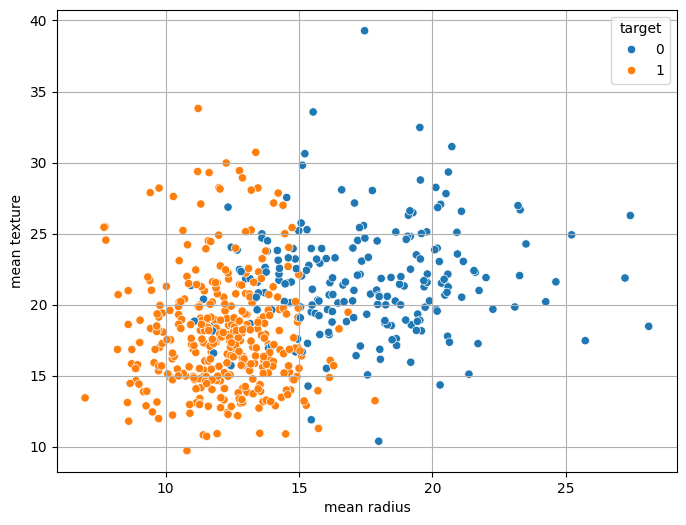

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_2d,x=features[0],y=features[1],hue='target')
plt.grid(True)
plt.show()

In [ ]:
x = df_2d[features]
y= df_2d['target']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8654970760233918


In [ ]:
from sklearn.model_selection import cross_val_score

# Best Model Selection

In [ ]:
k_range = range(1,21,2)
cv_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_scaled, y, cv=5, scoring='accuracy')
  cv_scores.append(scores.mean())

In [ ]:
print(cv_scores)

[np.float64(0.8453501009160067), np.float64(0.8787610619469026), np.float64(0.8822698338767271), np.float64(0.887532991771464), np.float64(0.8752057133985407), np.float64(0.8857320291880143), np.float64(0.8822232572581898), np.float64(0.8875174662319516), np.float64(0.8928116752057134), np.float64(0.8945505356311131)]


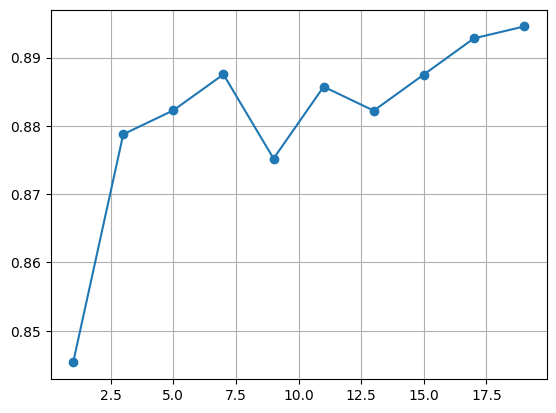

In [ ]:
plt.plot(k_range,cv_scores, marker='o')
plt.grid(True)
plt.show()

In [ ]:
best_k = k_range[(np.argmax(cv_scores))]
print(best_k)

19


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=19)
best_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
y_pred = best_knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
target_names = data.target_names

In [ ]:
cm= confusion_matrix(y_test,y_pred)

<Axes: >

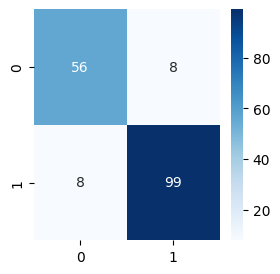

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot= True, cmap='Blues')